# **A: Analyse the tuning time per parameter combination for all models in the TSP**

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

# Add the parent directory to the Python path to load funtions from file ML_funtions
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sys.path.append(parent_directory)

# Import helperfunctions
from ML_functions import fun_convert_time

# Load the Data Frame
df = pd.read_excel("c_TSP_tuning_details.xlsx")
df = df.set_index("Unnamed: 0")
df.index.name = None
df

,KNN,Ridge,PR,DT,RF,GBRT,XGBoost,SVM,KM,NN
Search type,GridSearchCV,GridSearchCV,GridSearchCV,RandomizedSearchCV,RandomizedSearchCV,RandomizedSearchCV,GridSearchCV,GridSearchCV,GridSearchCV,GridSearchCV
Parameter combinations,12,5,12,50,50,25,54,24,36,120
Total tuning time,39s,1s,"38m, 29s",41s,"14m, 10s","19m, 46s","11m, 51s","1m, 39s","35m, 37s","1h, 37m"
Total tuning fit time,1s,4s,"23m, 55s","2m, 13s","54m, 22s","1h, 14m","44m, 3s","5m, 47s","1h, 42m","6h, 26m"
Total tuning prediction time,"2m, 12s",0s,15s,2s,11s,6s,"1m, 38s",2s,"36m, 22s",16s


### **Convert the time string into seconds**

In [2]:
# Get all the stime strings
tuning_times = df.loc["Total tuning time"]
tuning_times

KNN             39s
Ridge            1s
PR         38m, 29s
DT              41s
RF         14m, 10s
GBRT       19m, 46s
XGBoost    11m, 51s
SVM         1m, 39s
KM         35m, 37s
NN          1h, 37m
Name: Total tuning time, dtype: object

In [3]:
# Function to convert the time in strings back into a number of seconds
def fun_convert_string_to_seconds(string):
    # Check if the string has hours
    if ("h" in string):
        # Get the hours of the string
        h_loc = [letter == "h" for letter in string].index(True)
        hours = int(string[:h_loc])

        # Get the minutes of the string
        m_loc = [letter == "m" for letter in string].index(True)
        minutes = int(string[h_loc+3:m_loc])

        # Get the seconds of the string
        seconds = 0

    # Check if the string has minutes
    elif ("m" in string):
        # Get the hours of the string
        hours = 0

        # Get the minutes of the string
        m_loc = [letter == "m" for letter in string].index(True)
        minutes = int(string[:m_loc])

        # Get the seconds of the string
        s_loc = [letter == "s" for letter in string].index(True)
        seconds = int(string[m_loc+3:s_loc])

    else:
        # Get the hours and minutes of the string
        hours, minutes = 0, 0

        # Get the seconds of the string
        s_loc = [letter == "s" for letter in string].index(True)
        seconds = int(string[:s_loc])

    # Compute the total time in seconds
    total_time_in_sec = hours * 60**2 + minutes * 60 + seconds
    print(f"There are {total_time_in_sec:<5} Seconds in {string}.")
    #print(hours, minutes, seconds, total_time_in_sec)
    return total_time_in_sec

# Apply the function and append the seconds per model to the list
seconds_list = []
for string in tuning_times: 
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Total tuning time (sec)"] = seconds_list
df.loc["Total tuning time (min)"] = [i / 60 for i in seconds_list]

# Compute the tuning time per parameter combination for all models as a new row
df.loc["Tuning time per parameter combination (sec)"] = df.loc["Total tuning time (sec)"] / df.loc["Parameter combinations"]
df

There are 39    Seconds in 39s.
There are 1     Seconds in 1s.
There are 2309  Seconds in 38m, 29s.
There are 41    Seconds in 41s.
There are 850   Seconds in 14m, 10s.
There are 1186  Seconds in 19m, 46s.
There are 711   Seconds in 11m, 51s.
There are 99    Seconds in 1m, 39s.
There are 2137  Seconds in 35m, 37s.
There are 5820  Seconds in 1h, 37m.


,KNN,Ridge,PR,DT,RF,GBRT,XGBoost,SVM,KM,NN
Search type,GridSearchCV,GridSearchCV,GridSearchCV,RandomizedSearchCV,RandomizedSearchCV,RandomizedSearchCV,GridSearchCV,GridSearchCV,GridSearchCV,GridSearchCV
Parameter combinations,12,5,12,50,50,25,54,24,36,120
Total tuning time,39s,1s,"38m, 29s",41s,"14m, 10s","19m, 46s","11m, 51s","1m, 39s","35m, 37s","1h, 37m"
Total tuning fit time,1s,4s,"23m, 55s","2m, 13s","54m, 22s","1h, 14m","44m, 3s","5m, 47s","1h, 42m","6h, 26m"
Total tuning prediction time,"2m, 12s",0s,15s,2s,11s,6s,"1m, 38s",2s,"36m, 22s",16s
Total tuning time (sec),39,1,2309,41,850,1186,711,99,2137,5820
Total tuning time (min),0.65,0.016667,38.483333,0.683333,14.166667,19.766667,11.85,1.65,35.616667,97.0
Tuning time per parameter combination (sec),3.25,0.2,192.416667,0.82,17.0,47.44,13.166667,4.125,59.361111,48.5


### **Rename the models**

In [4]:
# Sort the values
total_tuning_time = df.loc["Total tuning time (min)"]#.sort_values()
time_per_comb = df.loc["Tuning time per parameter combination (sec)"]#.sort_values()

# Adjust the model names
names_dict = {"Ridge": "Ridge",
              "PR": "PR",
              "DT": "Tree",
              "SVM": "SVM", 
              "KNN": "KNN",
              "XGBoost": "XGBoost", 
              "RF": "Forest",
              "KM": "Kernel", 
              "GBRT": "GBRT",
              "NN": "MLP"}

total_tuning_time.index = [names_dict[name] for name in list(total_tuning_time.index)]
time_per_comb.index = [names_dict[name] for name in list(time_per_comb.index)]
display(total_tuning_time, time_per_comb)

KNN             0.65
Ridge       0.016667
PR         38.483333
Tree        0.683333
Forest     14.166667
GBRT       19.766667
XGBoost        11.85
SVM             1.65
Kernel     35.616667
MLP             97.0
Name: Total tuning time (min), dtype: object

KNN              3.25
Ridge             0.2
PR         192.416667
Tree             0.82
Forest           17.0
GBRT            47.44
XGBoost     13.166667
SVM             4.125
Kernel      59.361111
MLP              48.5
Name: Tuning time per parameter combination (sec), dtype: object

### **Create a plot**

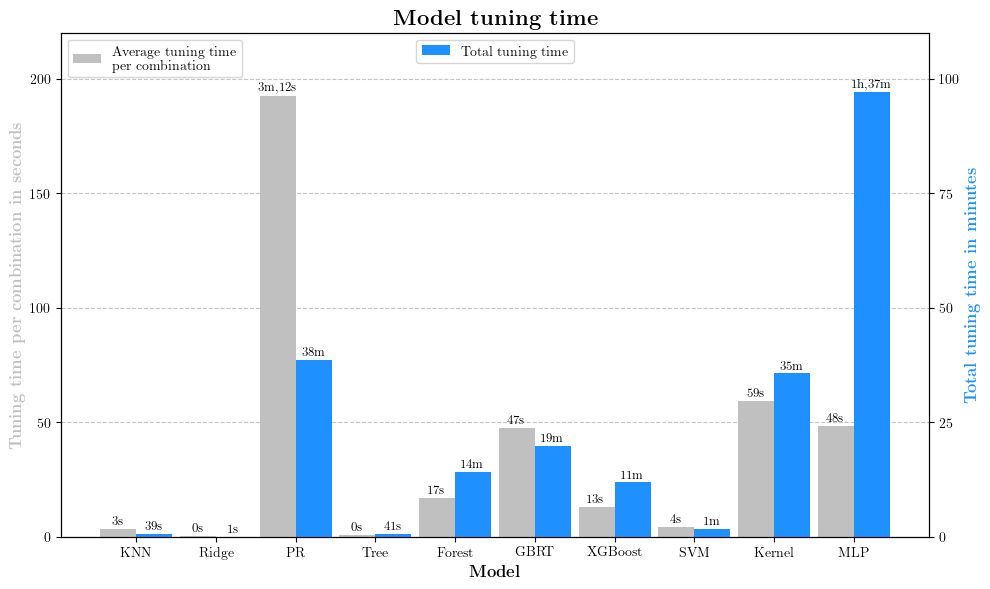

In [5]:
# Set LaTeX style fonts in matplotlib
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("text", usetex=True)
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the position of each bar on the x-axis and define the bar width
x = np.arange(stop=len(df.columns))
bar_width = 0.45

# Visualize the tuning time per parameter combination for each model
ax1.bar(x - bar_width/2, time_per_comb, width=bar_width, label="Average tuning time\n per combination", color="silver", zorder=2)

# Visualize the total tuning time for each model on a secondary y-axis for better scaling
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, total_tuning_time, width=bar_width, label="Total tuning time", color="dodgerblue")

# Set the x-ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(time_per_comb.index)

# Align gridlines by setting limits on both axes (set the same number of ticks for both y-axes)
ax1.set_ylim(0, 220)
ax1.set_yticks([0, 50, 100, 150, 200])
ax2.set_ylim(0, 110)
ax2.set_yticks([0, 25, 50, 75, 100])
ax1.grid(axis="y", linestyle="--", alpha=0.75)

# Use LaTeX commands for bold text in the title and labels
ax1.set_xlabel(r"\textbf{Model}", size=12)
ax1.set_ylabel(r"\textbf{Tuning time per combination in seconds}", size=12, color="silver")
ax2.set_ylabel(r"\textbf{Total tuning time in minutes", size=12, color="dodgerblue")
plt.title(r"\textbf{Model tuning time}", size=16, color="black")

# Annotate tuning time per combination bars
for i, value in enumerate(time_per_comb):
    time_string = fun_convert_time(seconds=value, space="")
    ax1.annotate(time_string, 
                 xy=(x[i] - bar_width / 2, value),  # Position above the bar
                 xytext=(-0.5, 3.5),  # Offset slightly to the left and upwards
                 textcoords="offset points",
                 ha="center", color="black", fontsize=9, rotation=0)

# Annotate total tuning time bars
for i, value in enumerate(total_tuning_time):
    time_string = fun_convert_time(seconds=value*60, space="")
    if ("s" and "m" in time_string):
        time_string = time_string.split("m")[0] + "m"
    ax2.annotate(time_string, # convert time in minutes to string of hours and min
                 xy=(x[i] + bar_width / 2, value),  # Position above the bar
                 xytext=(0, 3.5),  # Offset slightly upwards
                 textcoords="offset points",
                 ha="center", color="black", fontsize=9, rotation=0)

# Add legend for clarity
ax1.legend(loc="upper left")
ax2.legend(loc="upper center")

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Save the plot as a PNG file with high quality
plt.savefig("../06_graphics/model_tuning_time.png", bbox_inches="tight", dpi=500)
plt.show()

# **B: Analyse the fit and prediction time of the final configuration for all models in the TSP**

In [6]:
# Load the Data Frame
df = pd.read_excel("../04_test_results/TSP_results.xlsx")
df = df.set_index("Unnamed: 0")
df.index.name = None
df

,KNN,Linear Regression,Ridge Regression,Polynomial Regression,Decision Tree,Random Forest,GBRT,XGBoost,SVM,Kernel Machine,Neural Network
CV times,16s,2s,2s,"13m, 4s",4s,"2m, 59s","2m, 0s",17s,2s,"13m, 5s","12m, 8s"
Fit times,0s,0s,0s,"6m, 21s",2s,"1m, 49s","2m, 28s",6s,0s,"4m, 3s","33m, 11s"
Prediction times,1s,0s,0s,1s,0s,0s,0s,0s,0s,19s,0s


### **Convert the time string into seconds**

In [7]:
# Get all the stime strings
fit_times = df.loc["Fit times"]
predict_times = df.loc["Prediction times"]

In [8]:
# Apply the function and append the seconds per model to the list
seconds_list = []
for string in fit_times:
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Fit times in seconds"] = seconds_list
df.loc["Fit times in minutes"] = [value / 60 for value in seconds_list]

# Apply the function and append the seconds per model to the list
seconds_list = []
for string in predict_times:
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Prediction times in minutes"] = [value / 60 for value in seconds_list]
df

There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 381   Seconds in 6m, 21s.
There are 2     Seconds in 2s.
There are 109   Seconds in 1m, 49s.
There are 148   Seconds in 2m, 28s.
There are 6     Seconds in 6s.
There are 0     Seconds in 0s.
There are 243   Seconds in 4m, 3s.
There are 1991  Seconds in 33m, 11s.
There are 1     Seconds in 1s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 1     Seconds in 1s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 19    Seconds in 19s.
There are 0     Seconds in 0s.


,KNN,Linear Regression,Ridge Regression,Polynomial Regression,Decision Tree,Random Forest,GBRT,XGBoost,SVM,Kernel Machine,Neural Network
CV times,16s,2s,2s,"13m, 4s",4s,"2m, 59s","2m, 0s",17s,2s,"13m, 5s","12m, 8s"
Fit times,0s,0s,0s,"6m, 21s",2s,"1m, 49s","2m, 28s",6s,0s,"4m, 3s","33m, 11s"
Prediction times,1s,0s,0s,1s,0s,0s,0s,0s,0s,19s,0s
Fit times in seconds,0,0,0,381,2,109,148,6,0,243,1991
Fit times in minutes,0.0,0.0,0.0,6.35,0.033333,1.816667,2.466667,0.1,0.0,4.05,33.183333
Prediction times in minutes,0.016667,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.316667,0.0


### **Rename the models**

In [9]:
# Sort the values
fit_times_in_min = df.loc["Fit times in minutes"].sort_values()
display(fit_times_in_min)

KNN                            0.0
Linear Regression              0.0
Ridge Regression               0.0
SVM                            0.0
Decision Tree             0.033333
XGBoost                        0.1
Random Forest             1.816667
GBRT                      2.466667
Kernel Machine                4.05
Polynomial Regression         6.35
Neural Network           33.183333
Name: Fit times in minutes, dtype: object

### **Create a plot**

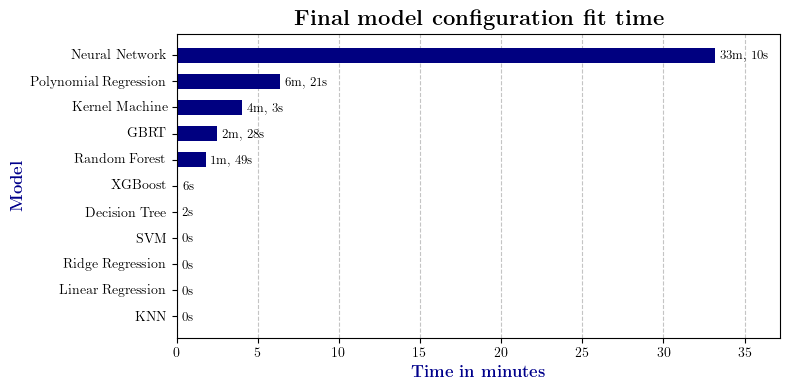

In [10]:
# Visualize scores of selected features
plt.figure(figsize=(8, 4))
bars = plt.barh(y=fit_times_in_min.index, width=fit_times_in_min, height=0.6, color="navy", zorder=2)

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{Time in minutes}", size=12, color="darkblue")
plt.ylabel(r"\textbf{Model}", size=12, color="darkblue")
plt.title(r"\textbf{Final model configuration fit time}", size=16, color="black")
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Annotate the bars with F-Test score values
for bar in bars:
    plt.text(
        x=bar.get_width() + 0.3, 
        y=bar.get_y() + bar.get_height() / 2.5, 
        s=f"{fun_convert_time(seconds=bar.get_width()*60)}", # convert the minutes into a string of minutes and seconds
        va="center", ha="left", fontsize=9, color="black")

# Increase x-axis limit to give extra space
plt.xlim(left=0, right=max(fit_times_in_min) + 4)

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Save the plot as a PNG file with high quality
plt.savefig("../06_graphics/final_model_configuration_fit_time.png", bbox_inches="tight", dpi=500)
plt.show()

In [11]:
# Set matplotlib style fonts to default again
plt.rcdefaults()